# SVM; Support Vector Machine
## 서포트 벡터 머신 (SVM)
서포트 벡터 머신은 머신러닝 알고리즘 중 분류 및 회귀 분석에 있어 높은 성능을 보여주는 대표적인 알고리즘입니다.

서포트 벡터 머신은 이진 분류를 위해 사용되는 알고리즘으로, 각 클래스의 가장 외곽의 데이터들이 가장 멀리 떨어지도록 합니다. 최대 마진(maximum margin)을 기준으로 하여 초평면(hyperplane)을 그어줌으로써 두 클래스를 구분합니다. 이를 토대로 새로운 데이터가 들어왔을 때, 좀 더 견고한 모델로써 분류를 진행할 수 있습니다.


### Linear SVM
서포트 벡터 머신은 크게 linear SVM과 non-linear SVM으로 나뉩니다. 복잡하지 않은 데이터에서 선형으로 클래스 분류가 가능하다면 linear SVM을 활용하여 멋진 분류기를 만들어 낼 수 있습니다. 이번 시간에는 linear SVM을 활용하여 클래스를 분류해 내도록 하겠습니다.

프로그램 내의 'data/dataset.txt’을 확인해보세요. 0과 1로 분류되어 있는 데이터 셋에서, Linear SVM을 사용하여 데이터가 올바르게 분류가 되는 지 확인해봅시다.

### 실습
pandas의pd.read_csv() 함수를 이용하여 “data/dataset.csv” 파일을 불러오세요.

data.head() 함수를 활용하여 Data의 첫 5개의 값을 출력해보세요.

linearSVM(data) 함수 내에 데이터 분류를 위해 data X, y를 ‘컬럼명’='Class’로 지정하여 다음 함수를 사용하여 전처리 하세요.

data.drop('컬럼명', axis = 1) : '컬럼명’을 제외하고 나머지 컬럼을 추출하는 함수
data['컬럼명']: ‘컬럼명’ 에 해당하는 데이터만 추출
Linear SVM에서 학습시킨 값(svm)에 대해 .predict(test_X) 메소드를 사용하여 pred_y 값을 추출해보세요.

결과로 출력되는 매트릭스는 Confusion Matrix와 분류 성능을 나타내는 지표입니다. 추후에 배울 내용이지만 미리 검색을 통해 알아보세요 ;)

(참고자료 : 위키백과-정밀도와 재현율)

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix 

def main():
    # 1. Data를 불러오세요
    data = pd.read_csv('./data/dataset.csv')
    
    #2. data.head() 함수를 활용하여 Data의 첫 5개의 값을 출력해 보세요
    #print(data.head())
    
    # Linear SVM 수행
    test_y, pred_y = linearSVM(data)
    
    # 값 출력
    print("\nConfusion matrix : \n",confusion_matrix(test_y,pred_y))  
    print("\nReport : \n",classification_report(test_y,pred_y)) 
    
def linearSVM(data):    
    # 3. Data를 X와 y로 나눠보세요.
    X = data.iloc[:,0:4]
    y = data['Class']
    
    # Training/test data set 분류
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20)
    
    # Linear SVM 수행
    svm = SVC(kernel='linear')  
    svm.fit(train_X, train_y)
    
    # 4. SVM predict 수행
    pred_y = svm.predict(test_X)
    
    return test_y, pred_y

if __name__ == "__main__":
    main()


Confusion matrix : 
 [[167   5]
 [  2 101]]

Report : 
              precision    recall  f1-score   support

          0       0.99      0.97      0.98       172
          1       0.95      0.98      0.97       103

avg / total       0.97      0.97      0.97       275



# Kernel SVM
좀 더 복잡한 데이터셋이 들어왔을 때 서포트 벡터 머신을 통해 높은 성능의 분류기를 만들어 내는 방법에 대해 알아봅시다.

https://i.stack.imgur.com/OrcTJ.png

앞선 실습에서는 클래스를 Linear SVM을 활용해서 분류를 진행했습니다. 육안으로 확인했을 때 선을 그어서 두 클래스를 쉽게 나눌 수 있는 경우에는 Linear SVM을 활용할 수 있지만, 오른쪽 그림과 같이 선을 그을 수 없는 경우에는 어떻게 해야 할까요?

그럴 때에는 Non-linear SVM을 통해서 데이터를 분류해 낼 수 있습니다. Non-linear SVM은 주어진 데이터에서 커널(kernel;Φ)이라는 함수를 적용해 차원을 높이고, 더 높은 차원에서 초평면(hyperplane)을 그어서 분류하는 방법입니다.

http://i.imgur.com/4i3ILsZ.png

### 실습
대표적인 비선형 data set으로는 XOR이 있습니다. XOR 데이터를 kernel SVM 으로 분류해내는 실습을 진행하도록 하겠습니다.

https://aimatters.files.wordpress.com/2015/12/xor-graph.png

np.random.seed()함수의 123번째 seed 값을 입력해 보세요.

nonlinear kernel 중 대표적인 값'rbf'를 kernel 인자로 넣어봅시다.

- ‘rbf’ 외에 ‘poly’, ‘sigmoid’ 를 넣고, ‘gamma’, ‘C’ 값을 조절해가며 어떻게 분류가 진행되는 지 확인해 보세요.

SVM을 학습 및 최적화 시키는 코드를 완성해 봅시다.

- .fit(x_data, y_data) : 데이터를 학습시키는 역할을 합니다.

random.randn(row, col) 함수의 컬럼을 2로 유지한 채, 데이터의 개수를 300에서 다른 값으로 바꿔서 출력해 보세요.

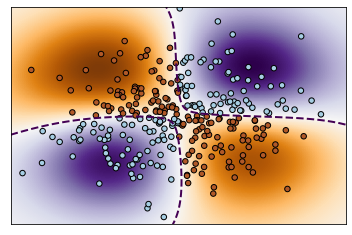

XOR Classification Result : 



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

def main():
    # 1. random 함수의 0번째 seed 값을 입력해 보세요.
    np.random.seed(123)
    # 4. random.randn 컬럼을 2로 유지한 채, 데이터의 개수를 300에서 다른 값으로 바꿔서 출력해 보세요.
    X = np.random.randn(300, 2)
    Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)
    
    # 2. nonlinear kernel 중 대표적인 값 'rbf'를 kernel 인자로 넣어봅시다.
    ### 'rbf' 외에 'poly', 'sigmoid' 를 넣고, 'gamma', 'C' 값을 조절해가며 어떻게 분류가 진행되는 지 확인해 보세요.
    svm_kernel = SVC(kernel='rbf', random_state=0, gamma=0.30, C=30.0)
    # 3. SVM을 학습시키는 코드를 완성해 봅시다.
    svm_kernel.fit(X, Y)
    
    # svm_kernel의 결과를 출력해주는 함수입니다.
    plot_kernelSVM_result(svm_kernel, X, Y)


def plot_kernelSVM_result(svm_model, X, Y):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                         np.linspace(-3, 3, 500))

    # plot the decision function for each datapoint on the grid
    Z = svm_model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
               origin='lower', cmap=plt.cm.PuOr_r)
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                           linestyles='dashed')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis([-3, 3, -3, 3])
    plt.show()
    
    print("XOR Classification Result : \n")
#     plt.savefig('xor.png')
    
if __name__ == "__main__":
    main()

# 나이브 베이즈 분류 (Naive Bayes Classifier)
나이브 베이즈 분류는 데이터의 확률적 속성을 가지고 클래스를 판단하는 꽤 높은 성능을 가지는 머신러닝 알고리즘입니다.

이를 이해하기 위해서 Bayes’ Theorem에 친숙해 질 필요가 있습니다.

### Bayes’ theorem
-----------------
        P(Y|X) = 
        P(X∣Y)∗P(Y)/P(X)

-----------------------

X는 관찰 값, Y는 결과 값을 표현합니다. data set 내에서 X와 Y의 빈도수를 활용하여 연산에 필요한 각각의 확률 값을 계산 할 수 있습니다.

엘리스의 이메일을 한 번 들여다 보면서 Bayes’ theorem을 이해해 볼까요? 앨리스의 이메일은 다음과 같은 텍스트 목록을 가지고 있습니다.

    타입	      텍스트
    Spam	 “(광고) XXX 지금 확인 해보세요.”        첨부파일 : exe
    Ham	    “[긴급]앨리스님, 확인 부탁드립니다.”     첨부파일 : exe
    Ham	     “Git 오프라인 수업을 3일 간 합니다”
    Spam	 “제목없음”                               첨부파일 : exe
    Spam	  “놓칠 수 없는 기회, 확인 해보세요.”

스팸 메일과 정상 메일에서 공통적으로 나타나는 키워드인 "확인"이 등장했을 때, 이 메일이 스팸 메일 인지, 정상 메일이 되는 지에 대해 판별해 보도록 하겠습니다.

''>>> P( "스팸 메일" | "확인" ) = ?''

''>>> P( "정상 메일" | "확인" ) = ?''


### 실습
앨리스의 메일함에는 총 20개의 메일이 들어있습니다. 그 중 스팸 메일은 8개, 정상 메일은 12개로 분류되어 있습니다. “확인” 키워드를 가지는 메일이 7개, "확인"을 제외한 메일이 13개라고 할 때, 다음과 같은 분포를 가집니다.

                 스팸 메일 	정상 메일     개수
        “확인”	  5  	 2	            7
         나머지	   3	   10	          13
          개수	    8	    12	          20
  
P(“스팸 메일”) 의 확률을 구하세요.

P(“확인” | “스팸 메일”) 의 확률을 구하세요.

P(“정상 메일”) 의 확률을 구하세요.

P(“확인” | 정상 메일") 의 확률을 구하세요.

P( “스팸 메일” | “확인” ) 의 확률을 구하세요.

P( “정상 메일” | “확인” ) 의 확률을 구하세요.

In [5]:
import numpy as np
    
def main():
	# 1. P(“스팸 메일”) 의 확률을 구하세요.
    p_spam = 8/20 # Y1   =   

    # 2. P(“확인” | “스팸 메일”) 의 확률을 구하세요.
    p_confirm_spam = 5/8 #  X|Y1
    
    # 3. P(“정상 메일”) 의 확률을 구하세요.
    p_ham = 12/20   #  Y0
    
    # 4. P(“확인” | "정상 메일" ) 의 확률을 구하세요.
    p_confirm_ham = 2/12  #   X|Y0
    
    # 5. P( "스팸 메일" | "확인" ) 의 확률을 구하세요.
    p_spam_confirm = p_confirm_spam*p_spam/(7/20)  #p_confirm_spam * p_spam   #  Y1|X   
    
    # 6. P( "정상 메일" | "확인" ) 의 확률을 구하세요.
    p_ham_confirm =p_ham*p_confirm_ham/ (7/20)  # Y0|X
    
    print("P(spam|confirm) = ",p_spam_confirm, "\nP(ham|confirm) = ",p_ham_confirm, "\n")
        
    # 두 값을 비교하여 확인 키워드가 스팸에 가까운지 정상 메일에 가까운지 확인합니다.
    value = [p_spam_confirm, p_ham_confirm]
    result = normalization(value)
    
    print("P(spam|confirm) normalization = ",result[0], "\nP(ham|confirm) normalization = ",result[1], "\n")
    
    if p_spam_confirm > p_ham_confirm:
        print( round(result[0] * 100, 2), "% 의 확률로 스팸 메일에 가깝습니다.")
    else :
        print( round(result[1] * 100, 2), "% 의 확률로 일반 메일에 가깝습니다.")

# 리스트 안에 값들을 정규화 합니다.
def normalization(x):
    return [element / sum(x) for element in x]
    
if __name__ == "__main__":
    main()


P(spam|confirm) =  0.7142857142857143 
P(ham|confirm) =  0.2857142857142857 

P(spam|confirm) normalization =  0.7142857142857143 
P(ham|confirm) normalization =  0.2857142857142857 

71.43 % 의 확률로 스팸 메일에 가깝습니다.


# 나이브 베이즈 분류 (Naive Bayes Classifier)
## Naive Bayes classifier
Bayes’ theorem을 공부했다면, 좀 더 심화된 나이브 베이즈 분류를 생각해 볼 수 있습니다. 앨리스의 메일을 다시 들여다 보겠습니다.

----------------------------
        타입	텍스트
        Spam	“(광고) XXX 지금 확인 해보세요.”      첨부파일 : exe
        Ham	 “[긴급]앨리스님, 확인 부탁드립니다.”     첨부파일 : exe
        Ham	 “Git 오프라인 수업을 3일 간 합니다”
        Spam	“제목없음”                            첨부파일 : exe
        Spam	“놓칠 수 없는 기회, 확인 해보세요.”

---------------------------------
이전에는 메일 내에서 스팸 및 정상 메일을 분류할 때,

- XX = ‘확인’ 키워드 유무(O or X)
- YY = 메일 결과 (스팸 or 정상)

로, XX의 특성이 1개 였습니다.

------------------------------
    ‘확인’ 키워드 유무	결과(스팸 VS 정상 메일)
    O	스팸
    X	정상 메일
    O	정상 메일
    
-----------------------
하지만, 만약에 이메일에서 ‘확인’ 키워드 말고도 '.exe 첨부파일’을 보냈는지, 안보냈는지를 고려하여 스팸메일을 분류한다면, 문제가 좀 더 복잡해 질 것 같은데요.

--------------------------------
    ‘확인키워드	 .exe 파일	 결과(스팸 VS 정상 메일)
        O	         O	         스팸
        X	         X	         정상 메일
        O	         X	         정상 메일

------------------------------------------
X의 속성이 많아졌을 때, Y를 판단하는 기준에 대한 경우의 수가 많아지게 됩니다. 이 때 나이브 베이즈 분류 수식을 사용하여 문제를 해결해 나갈 수 있는데요. 나이브 베이즈 분류 수식은 다음과 같습니다.

X는 관찰 값, Y는 결과 값을 표현합니다. data set 내에서 X와 Y의 빈도수를 활용하여 연산에 필요한 각각의 확률 값을 계산 할 수 있습니다.

이것을 토대로, 새로운 X에 대한 Y가 나타날 확률을 구하고, 최적의 Y를 도출해보도록 하겠습니다.

        >>> P( "스팸 메일" | "확인", ".exe" ) = ?
        >>> P( "정상 메일" | "확인", ".exe" ) = ?

### 실습
앨리스의 메일함에는 총 60개의 메일이 들어있습니다. 그 중 스팸 메일은 25개, 정상 메일은 35개로 분류되어 있습니다. “확인” 키워드를 가지는 메일과 exe 파일을 가지는 메일의 분포는 다음과 같습니다.

------------------------------------
                             스팸 메일	정상 메일	개수
        “확인” 키워드	   8	             5	     13
        다른 키워드	        17	           30    	47
        합계	               25  	        35   	 60

-----------------------------
                            스팸 메일	정상 메일	개수
        exe 파일 있음	        3	       2	       5
        exe 파일 없음	      22	      33	        55
        합계	                25	      35         60

-------------------------------
- P(“스팸 메일”) 의 확률을 구하세요.

- P(“확인” | “스팸 메일”), P(“exe” | “스팸 메일”) 의 확률을 구하세요.

- P(“정상 메일”) 의 확률을 구하세요.

- P(“확인” | 정상 메일"), P(“exe” | 정상 메일") 의 확률을 구하세요.

- P( “스팸 메일” | “확인”, “exe” ) 의 확률을 구하세요. (※ P(“확인”,“exe”) 값은 1이라 가정하겠습니다.)

- P( “정상 메일” | “확인”, “exe” ) 의 확률을 구하세요. (※ P(“확인”,“exe”) 값은 1이라 가정하겠습니다.)

In [6]:
import numpy as np
    
def main():
	# 1. P(“스팸 메일”) 의 확률을 구하세요.
    p_spam = 25/60

    # 2. P("확인" | "스팸 메일"), P("exe" | "스팸 메일") 의 확률을 구하세요.
    p_confirm_spam = 8/25
    p_exe_spam = 3/25
    
    # 3. P(“정상 메일”) 의 확률을 구하세요.
    p_ham = 35/60
    
    # 4. P("확인" | 정상 메일"), P("exe" | 정상 메일") 의 확률을 구하세요.
    p_confirm_ham = 5/35
    p_exe_ham = 2/35
    
    # 5. P( "스팸 메일" | "확인", "exe" ) 의 확률을 구하세요. (※ P("확인","exe") 값은 1이라고 가정 하겠습니다.)
    p_spam_confirm = p_spam*p_confirm_spam*p_exe_spam #/(13/60*5/60)
    
    # 6. P( "정상 메일" | "확인", "exe" ) 의 확률을 구하세요. (※ P("확인","exe") 값은 1이라고 가정 하겠습니다.)
    p_ham_confirm = p_ham*p_confirm_ham*p_exe_ham #/(13/60*5/60)
    
    print("P(spam|confirm, exe) = ",p_spam_confirm, "\nP(ham|confirm, exe) = ",p_ham_confirm, "\n")
        
    # 두 값을 비교하여 확인 키워드가 스팸에 가까운지 정상 메일에 가까운지 확인합니다.
    value = [p_spam_confirm, p_ham_confirm]
    result = normalization(value)
    
    print("P(spam|confirm, exe) normalization = ",result[0], "\nP(ham|confirm, exe) normalization = ",result[1], "\n")
    
    if p_spam_confirm > p_ham_confirm:
        print( round(result[0] * 100, 2), "% 의 확률로 스팸 메일에 가깝습니다.")
    else :
        norm_result = softmax(result)[1]
        print( round(result[1] * 100, 2), "% 의 확률로 일반 메일에 가깝습니다.")

# 리스트 안에 값들을 정규화 합니다.
def normalization(x):
    return [element / sum(x) for element in x]
    

if __name__ == "__main__":
    main()


P(spam|confirm, exe) =  0.016 
P(ham|confirm, exe) =  0.0047619047619047615 

P(spam|confirm, exe) normalization =  0.7706422018348624 
P(ham|confirm, exe) normalization =  0.22935779816513757 

77.06 % 의 확률로 스팸 메일에 가깝습니다.


# Logistic regression

https://kasausyrzlhe1066469.cdn.ntruss.com/global/file/p/5d23406857b37f6cdba254b2/logistic%20regression.png

로지스틱 회귀(Logistic regression)는 선형 회귀(Linear regression)와 비슷하지만 연속형이 아닌 이산 데이터들을 가지고 0 혹은 1로 변환하여 곡선을 그리고, 이를 토대로 이산 데이터를 분류하는 알고리즘입니다.

이번 시간에는 간단하게 로지스틱 회귀를 호출하는 함수로 실습을 진행해 보도록 하겠습니다.

### 실습
사용 할 함수

- linear_model.LogisticRegression(C=C, solver=solver) : 로지스틱 회귀 모형을 불러 옵니다.

Logistic Regression model을 호출해 봅시다.

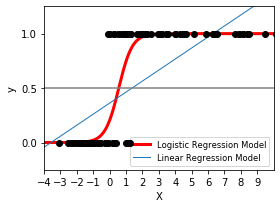

In [8]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from scipy.special import expit


def main():
    np.random.seed(0)
    n_samples = 100
    
    X = np.random.normal(size=n_samples)
    y = (X > 0).astype(np.float)
    X[X > 0] *= 5
    X += .7 * np.random.normal(size=n_samples)
    X = X[:, np.newaxis]

    # 1. Logistic Regression model을 호출해 봅시다.
    C=1e5
    solver='lbfgs'
    clf = linear_model.LogisticRegression(C=C, solver=solver)
    clf.fit(X, y)
    
    # plot을 그려줍니다.
    plot_logistic_regression(clf, X, y)


# plot을 그려주는 함수입니다.
def plot_logistic_regression(model, X_data, y_data):
    # and plot the result
    plt.figure(1, figsize=(4, 3))
    plt.clf()
    plt.scatter(X_data.ravel(), y_data, color='black', zorder=20)
    X_test = np.linspace(-5, 10, 300)

    loss = expit(X_test * model.coef_ + model.intercept_).ravel()
    plt.plot(X_test, loss, color='red', linewidth=3)

    ols = linear_model.LinearRegression()
    ols.fit(X_data, y_data)
    plt.plot(X_test, ols.coef_ * X_test + ols.intercept_, linewidth=1)
    plt.axhline(.5, color='.5')

    plt.ylabel('y')
    plt.xlabel('X')
    plt.xticks(range(-5, 10))
    plt.yticks([0, 0.5, 1])
    plt.ylim(-.25, 1.25)
    plt.xlim(-4, 10)
    plt.legend(('Logistic Regression Model', 'Linear Regression Model'),
               loc="lower right", fontsize='small')
    plt.tight_layout()
    plt.show()

#     plt.savefig('image.png')

if __name__ == "__main__":
    main()


# Scikit-learn을 활용한 나이브 베이즈 분류
UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets) 는 머신러닝의 여러 알고리즘을 다뤄보기에 좋은 데이터 셋들을 담고 있는 사이트 입니다.

연속적인 값을 지닌 데이터를 처리 할때, 각 클래스의 연속적인 값들이 가우스 분포를 따른다고 가정 하면 가우시안 나이브 베이즈 확률을 사용합니다. 예를 들어, 트레이닝 데이터가 연속적인 속성 x를 포함하는 것으로 가정하면, 먼저 클래스에 따라 데이터를 나눈 뒤에, 각 클래스에서 x의 평균과 분산을 계산합니다. 클래스 c와 연관된 x 값의 평균, 분산을 가지고, 주어진 클래스의 값들의 확률 분포가 M과 S로 매개변수화되어 정규분포식을 통해 계산 될 수 있습니다.

이번 실습에서는 Wine 데이터를 활용하여 나이브베이즈 분류 방법 중 하나인 "가우시안 나이브 베이즈 모델"을 학습시키고 분류가 잘 되었는지 확인해봅시다.

#### 다루게 될 함수

- pd.DataFrame.shape : 데이터 셋의 row, column 을 표현합니다.
- pd.DataFrame.head() : 앞부분 5행의 데이터를 보여줍니다.
- train_test_split(X, y, test_size, random_state)
- X : data
- y : label(=target)
- test_size : test 할 데이터 비율
- random_state : random 상태 중 하나의 상태 입력
- GaussianNB.fit(X,y) : data와 label을 집어넣어 가우시안 나이브 베이즈 모델에 training 시켜줍니다.

### 실습
wine.data를 DataFrame 형태로 변형해보세요.

df_wine_X, df_wine_Y의 shape를 확인해 보세요.

df_wine_X, df_wine_Y의 앞부분 5행의 데이터를 확인해보세요.

8:2의 비율로 train data 와 test data를 분리해보세요.

가우시안 나이브 베이즈로 모델을 트레이닝을 진행합니다. None을 완성하세요.

X test 데이터로 모델이 잘 동작하는지 문제를 풀어봅니다.



In [9]:
import pandas as pd
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

def main():
    wine = load_wine()

    ## wine은 X값인 wine.data와 Y값인 wine.target으로 나뉩니다.
    # 1. wine.data를 DataFrame 형태로 변형해보세요.
    df_wine_X = pd.DataFrame(wine.data, columns=wine.feature_names)
    df_wine_Y = pd.DataFrame(wine.target)

    # 2. df_wine_X, df_wine_Y의 shape를 확인해 보세요.
    print("df_wine_X shape : ", df_wine_X.shape)
    print("df_wine_Y shape : ", df_wine_Y.shape)

    # 3. df_wine_X, df_wine_Y의 앞부분 5행의 데이터를 확인해보세요.
    print("\ndf_wine_X head : ", df_wine_X.head())
    print("\ndf_wine_Y head : ", df_wine_Y.head())
    
    
    # 4. wine.data, wine.target 데이터로 8:2의 비율로 train data 와 test data를 분리해보세요.
    X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)  

    # 5. 가우시안 나이브 베이즈로 모델을 트레이닝을 진행합니다. None을 완성하세요.
    model = GaussianNB()
    model.fit(X_train, y_train)

    # 6. X test 데이터로 모델이 잘 동작하는지 문제를 풀어봅니다.
    predicted = model.predict(X_test)

    ## confusion matrix로 분류 성능을 확인해봅니다.
    print("\nConfusion matrix : ")
    print(confusion_matrix(y_test, predicted)) 
    
    return df_wine_X, X_train, X_test, y_train, y_test, predicted

if __name__ == "__main__":
    main()


df_wine_X shape :  (178, 13)
df_wine_Y shape :  (178, 1)

df_wine_X head :     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4